In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
# from pytrends.request import TrendReq

In [9]:
movies = pd.read_csv("imdb_top_1000.csv")

names = movies["Series_Title"]
years = movies["Released_Year"]
imdb = movies["IMDB_Rating"]
metarating = movies["Meta_score"]
gross = movies["Gross"]


directors = []
for x in movies["Director"]:
    if x not in directors:
        directors.append(x)

MeanRatings = []
for x in directors:
    # DirectorX eh uma variavel temporaria usada apenas neste loop
    DirectorX = movies[movies["Director"] == x]
    MeanRatings.append(np.mean(DirectorX["IMDB_Rating"]))


[('Frank Darabont', array([-0.04970906,  3.08301371])), ('Francis Ford Coppola', array([0.03469571, 1.51376185])), ('Christopher Nolan', array([0.01067077, 1.93259219])), ('Sidney Lumet', array([-0.05798833,  3.07601363])), ('Peter Jackson', array([ 0.38598042, -5.42877455])), ('Quentin Tarantino', array([-1.70150894e-03,  2.13057244e+00])), ('Steven Spielberg', array([0.01764366, 1.74981511])), ('David Fincher', array([-0.01023622,  2.26880659])), ('Robert Zemeckis', array([ 0.1151279 , -0.10628903])), ('Sergio Leone', array([0.02423779, 1.73519819])), ('Martin Scorsese', array([0.02023875, 1.75180184])), ('Milos Forman', array([0.06130386, 1.02711662])), ('Bong Joon Ho', array([0.0078535 , 1.99306655])), ('Hayao Miyazaki', array([-0.00558866,  2.18048139])), ('Jonathan Demme', array([ 0.2104665, -1.7815923])), ('Akira Kurosawa', array([-1.91042662e-03,  2.14301647e+00])), ('Frank Capra', array([2.10091322e-16, 2.09186406e+00])), ('Todd Phillips', array([ 0.51943277, -8.05691203])), (

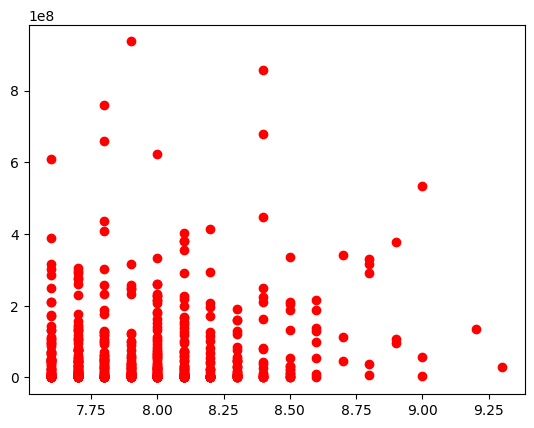

In [10]:
# Initialize lists to store data
director_coefficients = []
all_bilheteriaOrdenada = []
all_imdb_ratings = []

# Iterate through directors
for x in directors:
    # Filter movies for the current director
    tempData = movies[movies["Director"] == x]

    # Remove rows with NaN values in the "Gross" column
    tempData = tempData.dropna(subset=["Gross"])

    # Convert "Gross" values to integers after removing commas
    bilheteriaOrdenada = [int(str(x).replace(',', ''))
                          for x in tempData["Gross"]]

    # Extract IMDB ratings
    imdb_ratings = tempData["IMDB_Rating"]

    # Check if there are enough data points to fit a linear regression model
    if len(bilheteriaOrdenada) > 1:
        # Plot the data points
        plt.plot(imdb_ratings, bilheteriaOrdenada, 'ro')

        # Fit a linear regression model
        coefficients = np.polyfit(
            np.log(bilheteriaOrdenada), np.log(imdb_ratings.to_list()), 1)

        for bilheteria in bilheteriaOrdenada:
            all_bilheteriaOrdenada.append(bilheteria)
        for rate in imdb_ratings.to_list():
            all_imdb_ratings.append(rate)

        # Append the coefficients to the list
        director_coefficients.append((x, coefficients))
print(director_coefficients)

C:\Users\gusta\AppData\Local\Temp\ipykernel_2772\3890523144.py:3: RuntimeWarning: divide by zero encountered in log
  return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]


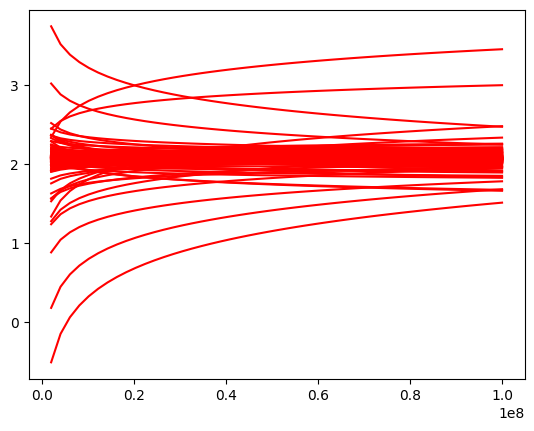

In [11]:
for director_coefficient in director_coefficients:
    def f(x):
        return director_coefficient[1][0]*np.log(x) + director_coefficient[1][1]

    if director_coefficient[1][0] > 10 or director_coefficient[1][1] > 10:
        continue

    # ax = plt.subplots()
    # ax.plot(x, f(x))
    # ax.set_xscale('log')

    x = np.linspace(0, 10**8)
    plt.plot(x, f(x), color='red')
    # plt.ylim(7, 10)

[28341469, 136801374, 134966411, 57300000, 83471511, 4420000, 66666062, 534858444, 292576195, 188020017, 53089891, 448139099, 25544867, 206852432, 188373161, 4360000, 50000000, 54000000, 29800000, 377845905, 315544750, 342551365, 258366855, 303003568, 107928762, 162805434, 120540719, 2832029, 70099045, 66208183, 54117416, 142502728, 96898818, 216540909, 248159971, 197171806, 164615351, 402453882, 260000000, 98467863, 435110554, 22238696, 72313754, 132072926, 132088635, 37030102, 100125643, 167767189, 102515793, 127509326, 48323648, 96962694, 33080084, 330252182, 210609762, 233632142, 118500000, 156452370, 6100000, 5321508, 5321508, 15000000, 14500000, 696690, 46836394, 132384315, 28262574, 128012934, 116900694, 42438300, 23383987, 7000000, 2500000, 10600000, 112000000, 51973029, 53367844, 14131, 547292, 10055859, 2375308, 4711096, 1105564, 495770, 5209580, 15090400, 130742922, 77324422, 269061, 55240, 4135750, 96568, 9600000, 4360000, 335451311, 277322503, 13092000, 151101803, 32572577

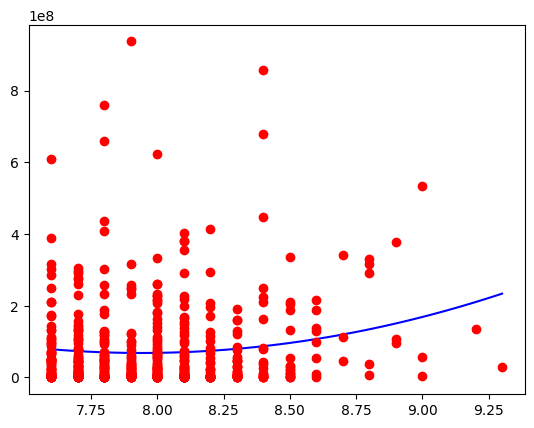

In [12]:
degree = 2

all_coefficients = np.polyfit(all_imdb_ratings,
    all_bilheteriaOrdenada, degree)

def f(x):
    response = 0
    for dg in range(0, degree+1):
        response += all_coefficients[dg]*(x**(degree-dg))
    return response

print(all_bilheteriaOrdenada)
print(all_imdb_ratings)
#print(all_coefficients)
x = np.linspace(min(all_imdb_ratings), max(all_imdb_ratings))
plt.plot(x, f(x), color='blue')
#plt.ylim(2.06, 2.08)

plt.plot(all_imdb_ratings, all_bilheteriaOrdenada, 'ro')

print(f(9))


In [13]:
for x in director_coefficients:
    p = np.poly1d([x[1][0], x[1][1]])
    print(p)

 
-0.04971 x + 3.083
 
0.0347 x + 1.514
 
0.01067 x + 1.933
 
-0.05799 x + 3.076
 
0.386 x - 5.429
 
-0.001702 x + 2.131
 
0.01764 x + 1.75
 
-0.01024 x + 2.269
 
0.1151 x - 0.1063
 
0.02424 x + 1.735
 
0.02024 x + 1.752
 
0.0613 x + 1.027
 
0.007853 x + 1.993
 
-0.005589 x + 2.18
 
0.2105 x - 1.782
 
-0.00191 x + 2.143
 
2.101e-16 x + 2.092
 
0.5194 x - 8.057
 
-0.02479 x + 2.546
 
0.02749 x + 1.643
 
-0.0005997 x + 2.1
 
0.02174 x + 1.798
 
-0.02965 x + 2.643
 
-0.08368 x + 3.545
 
-0.01418 x + 2.36
 
0.01614 x + 1.88
 
0.04269 x + 1.472
 
0.0006438 x + 2.087
 
-0.05393 x + 2.887
 
-0.005865 x + 2.203
 
0.009184 x + 1.978
 
0.08364 x + 0.413
 
-0.03531 x + 2.805
 
0.005612 x + 2.017
 
-0.06841 x + 3.444
 
0.0208 x + 1.814
 
-0.003367 x + 2.167
 
0.003815 x + 2.043
 
-0.02518 x + 2.554
 
-0.04209 x + 2.682
 
0.004817 x + 2.008
 
-0.01622 x + 2.362
 
0.05232 x + 1.21
 
-0.01882 x + 2.406
 
-0.01181 x + 2.287
 
-0.1989 x + 5.91
 
0.1529 x - 0.661
 
-0.018 x + 2.403
 
0.08279 x + 0.5525


In [24]:
from Actor import Actor

actors = []
actors_name = []

for index, row in movies.iterrows():

    movie_gross = 0
    if not str(row["Gross"]) == 'nan':
        movie_gross = int(str(row["Gross"]).replace(",", ""))
    
    if not row["Star1"] in actors_name:
        actors_name.append(row["Star1"])
        actors.append(Actor(row["Star1"]))
    
    if not row["Star2"] in actors_name:
        actors_name.append(row["Star2"])
        actors.append(Actor(row["Star2"]))
    
    if not row["Star3"] in actors_name:
        actors_name.append(row["Star3"])
        actors.append(Actor(row["Star3"]))
    
    if not row["Star4"] in actors_name:
        actors_name.append(row["Star4"])
        actors.append(Actor(row["Star4"]))

    for actor in actors:
        if actor.name == row["Star1"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star2"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star3"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

        if actor.name == row["Star4"]:
            actor.movies.append(row["Series_Title"])
            actor.avgGross = (actor.avgGross * len(actor.movies) + movie_gross) / (len(actor.movies) + 1)

for actor in actors:
    print(actor.name, actor.movies, actor.avgGross)

Tim Robbins ['The Shawshank Redemption', 'Mystic River', 'Short Cuts', 'Dark Waters'] 24917527.8
Morgan Freeman ['The Shawshank Redemption', 'Se7en', 'Unforgiven', 'Million Dollar Baby', 'Glory', 'Lucky Number Slevin', 'Gone Baby Gone'] 49967683.375
Bob Gunton ['The Shawshank Redemption'] 14170734.5
William Sadler ['The Shawshank Redemption'] 14170734.5
Marlon Brando ['The Godfather', 'Apocalypse Now', 'On the Waterfront', 'A Streetcar Named Desire'] 47207584.4
Al Pacino ['The Godfather', 'The Godfather: Part II', 'Scarface', 'Heat', 'Scent of a Woman', 'Dog Day Afternoon', 'The Irishman', "Carlito's Way", 'The Insider', 'Donnie Brasco', 'Glengarry Glen Ross', 'Serpico', 'The Godfather: Part III'] 45800884.928571425
James Caan ['The Godfather', 'Kaguyahime no monogatari', 'Misery'] 49437564.5
Diane Keaton ['The Godfather', 'The Godfather: Part II', 'Annie Hall', 'Manhattan', 'Love and Death', 'The Godfather: Part III'] 49118924.71428572
Christian Bale ['The Dark Knight', 'The Prestige'

In [ ]:
from Director import Director

directors = []
directors_name = []

for index, row in movies.iterrows():
    if not row["Director"] in directors_name:
        directors_name.append(row["Director"])
        directors.append(Director(row["Director"]))

    for director in directors:
        if director.name == row["Director"]:
            director.movies.append(row["Series_Title"])

for director in directors:
    print(director.name, director.movies)

Frank Darabont ['The Shawshank Redemption', 'The Green Mile']
Francis Ford Coppola ['The Godfather', 'The Godfather: Part II', 'Apocalypse Now', 'The Conversation', 'The Godfather: Part III']
Christopher Nolan ['The Dark Knight', 'Inception', 'Interstellar', 'The Prestige', 'The Dark Knight Rises', 'Memento', 'Batman Begins', 'Dunkirk']
Sidney Lumet ['12 Angry Men', 'Network', 'Dog Day Afternoon', 'The Verdict', 'Serpico']
Peter Jackson ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring', 'The Lord of the Rings: The Two Towers', 'The Hobbit: The Desolation of Smaug', 'The Hobbit: An Unexpected Journey']
Quentin Tarantino ['Pulp Fiction', 'Django Unchained', 'Inglourious Basterds', 'Reservoir Dogs', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'The Hateful Eight', 'Once Upon a Time... in Hollywood']
Steven Spielberg ["Schindler's List", 'Saving Private Ryan', 'Raiders of the Lost Ark', 'Indiana Jones and the Last Crusade', 'Catch Me If You 